# Data modeling

For the modeling, we used the next libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import regex as re
import pingouin
import datetime
import random
import pandas.api.types as ptypes
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy import stats
from sklearn.metrics import r2_score
from joblib import dump, load
import statsmodels.formula.api as smf

## Offer modeling

### Data loading

In [ ]:
#Path used at the local machine
ctivity=pd.read_csv('activities.csv')
activity

Dropping unnecesary columns for the modeling

In [ ]:

activity.drop(columns='Unnamed: 0', inplace=True)

### Train-Test split

For the train-test split, we created the function **partition** which split the original data

In [ ]:
# Function to split the data into training and testing 
def partition(X, y, p=0.3, random_state=1):
  from sklearn import model_selection
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=p,random_state=random_state)
  return X_train, X_test, y_train, y_test

Then, we created a function called **pipeline1** that creates a gridsearch object to look for the best parameters on the group

In [ ]:

def pipeline1(X_train, y_train, params, k, seed = 0):    
  estimators = [('dt1',RandomForestRegressor(random_state=seed))]
  pipeline=Pipeline(estimators)  
  grid_search = GridSearchCV(pipeline,params,cv=k,verbose=0)
  gsearch = grid_search.fit(X_train, y_train)
  return gsearch

Lastly, we used a function called **reporte_desempeño** which uses the final model and the info to create a report with the performance information.

In [ ]:
def reporte_desempeño(model, X_test, y_test):
  y_pred=model.predict(X_test)
  report=r2_score(y_test, y_pred)
  return report

### Clusters 

In this section, we used the methods to create, test and adjust the model to get the best results on each cluster.

#### Cluster 0

First, we filter and clean the data for the analysis

In [ ]:
# Filter data
df_cl0=df[df['cluster']==0]
df_cl0
#--

Agg0 = df_cl0.groupby(by = ['Dia', 'Mes', 'Hora', 'DiaSemana' ,'Latitud', 'Longitud'])['Fecha'].count()
df_agg0 = pd.DataFrame(data=Agg0).reset_index()
df_agg0 = df_agg0.rename(columns={"Fecha": "Oferta"})
df_agg0['Oferta'] = 80*df_agg0['Oferta']
df_agg0
#--

df_agg0['DiaSemana']=df_agg0['DiaSemana']+1
df_agg0['Hora']=df_agg0['Hora']+1
df_agg0
#--

X0=df_agg0[['Dia', 'Mes', 'Hora', 'DiaSemana', 'Latitud', 'Longitud']].to_numpy()
X0
#--

y0=df_agg0[['Oferta']].to_numpy()
y0
#--

y0=y0.reshape(-1)
y0.shape
##--

X_train0, X_test0, y_train0, y_test0 =partition(X0, y0)

Next, we exported the data to have a register.

In [ ]:
X_test0_df=pd.DataFrame(X_test0)
y_test0_df=pd.DataFrame(y_test0)
X_test0_df.to_csv('ml_models_act/x_test0.csv')
y_test0_df.to_csv('ml_models_act/y_test0.csv')

Lastly, we trained, validated and rate the performance on the cluster

In [ ]:
params={'dt1__n_estimators':[10, 50, 100,], 'dt1__max_depth':[10, 15, 20], 'dt1__n_jobs':[-1]}
gsearch0 = pipeline1(X_train0, y_train0, params, k=5)
#--

print(gsearch0.best_params_)
print(gsearch0.best_score_)
#--

reporte_desempeño(gsearch0, X_test0, y_test0)
#--

results0=gsearch0.cv_results_
results0
#--

y_pred0=gsearch0.predict(X_test0)
#--

ax = sns.distplot(y_test0, hist=False, label="Actual Value")
sns.distplot(y_pred0,hist=False, label="Fitted Values" , ax=ax)
#--

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test0, y_pred0))
print('Mean Squared Error:', metrics.mean_squared_error(y_test0, y_pred0))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test0, y_pred0)))

#### Cluster 1

First, we filter and clean the data for the analysis

In [ ]:
# Filter data
df_cl1=df[df['cluster']==1]
df_cl1
#--

Agg1 = df_cl1.groupby(by = ['Dia', 'Mes', 'Hora', 'DiaSemana' ,'Latitud', 'Longitud'])['Fecha'].count()
df_agg1 = pd.DataFrame(data=Agg1).reset_index()
df_agg1 = df_agg1.rename(columns={"Fecha": "Oferta"})
df_agg1['Oferta'] = 80*df_agg1['Oferta']
df_agg1
#--

df_agg1['DiaSemana']=df_agg1['DiaSemana']+1
df_agg1['Hora']=df_agg1['Hora']+1
df_agg1
#--

X1=df_agg1[['Dia', 'Mes', 'Hora', 'DiaSemana', 'Latitud', 'Longitud']].to_numpy()
X1
#--

y1=df_agg1[['Oferta']].to_numpy()
y1
#--

y1=y1.reshape(-1)
y1.shape
##--

X_train1, X_test1, y_train1, y_test1 =partition(X1, y1)

Next, we exported the data to have a register.

In [ ]:
X_test1_df=pd.DataFrame(X_test1)
y_test1_df=pd.DataFrame(y_test1)
X_test1_df.to_csv('ml_models_act/x_test1.csv')
y_test1_df.to_csv('ml_models_act/y_test1.csv')

Lastly, we trained, validated and rate the performance on the cluster

In [ ]:
# entrenamiento, validación y desempeño cluster 1
params={'dt1__n_estimators':[10, 50, 100], 'dt1__max_depth':[10, 15, 20], 'dt1__n_jobs':[-1]}
gsearch1 = pipeline1(X_train1, y_train1, params, k=5)
#--

print(gsearch1.best_params_)
print(gsearch1.best_score_)
#--

reporte_desempeño(gsearch1, X_test1, y_test1)
#--

results1=gsearch1.cv_results_
results1
#--

y_pred1=gsearch1.predict(X_test1)
#--

ax = sns.distplot(y_test1, hist=False, label="Actual Value")
sns.distplot(y_pred1,hist=False, label="Fitted Values" , ax=ax)
#--

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

#### Cluster 2

First, we filter and clean the data for the analysis

In [ ]:
# Filter data
# partición de datos cluster 2
df_cl2=df[df['cluster']==2]
df_cl2
#--

Agg2 = df_cl2.groupby(by = ['Dia', 'Mes', 'Hora', 'DiaSemana' ,'Latitud', 'Longitud'])['Fecha'].count()
df_agg2 = pd.DataFrame(data=Agg2).reset_index()
df_agg2 = df_agg2.rename(columns={"Fecha": "Oferta"})
df_agg2['Oferta'] = 80*df_agg2['Oferta']
df_agg2
#--

df_agg2['DiaSemana']=df_agg2['DiaSemana']+1
df_agg2['Hora']=df_agg2['Hora']+1
df_agg2
#--

X2=df_agg2[['Dia', 'Mes', 'Hora', 'DiaSemana', 'Latitud', 'Longitud']].to_numpy()
X2
#--

y2=df_agg2[['Oferta']].to_numpy()
y2
#--

y2=y2.reshape(-1)
y2.shape
##--

X_train2, X_test2, y_train2, y_test2 =partition(X2, y2)

Next, we exported the data to have a register.

In [ ]:
X_test2_df=pd.DataFrame(X_test2)
y_test2_df=pd.DataFrame(y_test2)
X_test2_df.to_csv('ml_models_act/x_test2.csv')
y_test2_df.to_csv('ml_models_act/y_test2.csv')

Lastly, we trained, validated and rate the performance on the cluster

In [ ]:
params={'dt1__n_estimators':[10, 50, 100], 'dt1__max_depth':[10, 15, 20], 'dt1__n_jobs':[-1]}
gsearch2 = pipeline1(X_train2, y_train2, params, k=5)
#--

print(gsearch2.best_params_)
print(gsearch2.best_score_)
#--

reporte_desempeño(gsearch2, X_test2, y_test2)
#--

results2=gsearch2.cv_results_
results2
#--

y_pred2=gsearch2.predict(X_test2)
#--

ax = sns.distplot(y_test2, hist=False, label="Actual Value")
sns.distplot(y_pred2,hist=False, label="Fitted Values" , ax=ax)
#--

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

#### Cluster 3

First, we filter and clean the data for the analysis

In [ ]:
# partición de datos cluster 3
df_cl3=df[df['cluster']==3]
df_cl3
#--

Agg3 = df_cl3.groupby(by = ['Dia', 'Mes', 'Hora', 'DiaSemana' ,'Latitud', 'Longitud'])['Fecha'].count()
df_agg3 = pd.DataFrame(data=Agg3).reset_index()
df_agg3 = df_agg3.rename(columns={"Fecha": "Oferta"})
df_agg3['Oferta'] = 80*df_agg3['Oferta']
df_agg3
#--

df_agg3['DiaSemana']=df_agg3['DiaSemana']+1
df_agg3['Hora']=df_agg3['Hora']+1
df_agg3
#--

X3=df_agg3[['Dia', 'Mes', 'Hora', 'DiaSemana', 'Latitud', 'Longitud']].to_numpy()
X3
#--

y3=df_agg3[['Oferta']].to_numpy()
y3
#--

y3=y3.reshape(-1)
y3.shape
##--

X_train3, X_test3, y_train3, y_test3 =partition(X3, y3)

Next, we exported the data to have a register.

In [ ]:
X_test3_df=pd.DataFrame(X_test3)
y_test3_df=pd.DataFrame(y_test3)
X_test3_df.to_csv('ml_models_act/x_test3.csv')
y_test3_df.to_csv('ml_models_act/y_test3.csv')

Lastly, we trained, validated and rate the performance on the cluster

In [ ]:
params={'dt1__n_estimators':[10, 50, 100], 'dt1__max_depth':[10, 15, 20], 'dt1__n_jobs':[-1]}
gsearch3 = pipeline1(X_train3, y_train3, params, k=5)
#--

print(gsearch3.best_params_)
print(gsearch3.best_score_)
#--

reporte_desempeño(gsearch3, X_test3, y_test3)
#--

results3=gsearch3.cv_results_
results3
#--

y_pred3=gsearch3.predict(X_test3)
#--

ax = sns.distplot(y_test3, hist=False, label="Actual Value")
sns.distplot(y_pred3,hist=False, label="Fitted Values" , ax=ax)
#--

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test3, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test3, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

#### Cluster 4

First, we filter and clean the data for the analysis

In [ ]:
# Filter data
df_cl4=df[df['cluster']==4]
df_cl4
#--

Agg4 = df_cl4.groupby(by = ['Dia', 'Mes', 'Hora', 'DiaSemana' ,'Latitud', 'Longitud'])['Fecha'].count()
df_agg4 = pd.DataFrame(data=Agg4).reset_index()
df_agg4 = df_agg4.rename(columns={"Fecha": "Oferta"})
df_agg4['Oferta'] = 80*df_agg4['Oferta']
df_agg4
#--

df_agg4['DiaSemana']=df_agg4['DiaSemana']+1
df_agg4['Hora']=df_agg4['Hora']+1
df_agg4
#--

X4=df_agg4[['Dia', 'Mes', 'Hora', 'DiaSemana', 'Latitud', 'Longitud']].to_numpy()
X4
#--

y4=df_agg4[['Oferta']].to_numpy()
y4
#--

y4=y4.reshape(-1)
y4.shape
##--

X_train4, X_test4, y_train4, y_test4 =partition(X4, y4)

Next, we exported the data to have a register.

In [ ]:
X_test4_df=pd.DataFrame(X_test4)
y_test4_df=pd.DataFrame(y_test4)
X_test4_df.to_csv('ml_models_act/x_test4.csv')
y_test4_df.to_csv('ml_models_act/y_test4.csv')

Later, we trained, validated and rate the performance on the cluster

In [ ]:
params={'dt1__n_estimators':[10, 50, 100,], 'dt1__max_depth':[10, 15, 20], 'dt1__n_jobs':[-1]}
gsearch4 = pipeline1(X_train4, y_train4, params, k=5)
#--

print(gsearch4.best_params_)
print(gsearch4.best_score_)
#--

reporte_desempeño(gsearch4, X_test4, y_test4)
#--

results4=gsearch4.cv_results_
results4
#--

y_pred4=gsearch4.predict(X_test4)
#--

ax = sns.distplot(y_test4, hist=False, label="Actual Value")
sns.distplot(y_pred4,hist=False, label="Fitted Values" , ax=ax)
#--

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test4, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test4, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))

### Exporting data

Finally, we export our models using the joblib library to use them inside our app.

In [ ]:
dump(gsearch, 'ml_models_act/rf_gs_clt1.joblib') 
dump(gsearch0, 'ml_models_act/rf_gs_clt0.joblib') 
dump(gsearch2, 'ml_models_act/rf_gs_clt2.joblib') 
dump(gsearch3, 'ml_models_act/rf_gs_clt3.joblib') 
dump(gsearch4, 'ml_models_act/rf_gs_clt4.joblib')

## Demand modeling

For the demand models, we used the following libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import dask.dataframe as dd
import datetime
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from joblib import dump, load

### Data load

In [ ]:
#%% Read data
valid = pd.read_csv('valid.csv')

In [ ]:
valid.head()

,Unnamed: 0,fecha_clearing,hora_trx,operador,ruta_modificada,linea_sae,tipo_vehiculo,vehiculo,tipo_viaje,linea,val_minute,val_hour,val_date,val_day_week,val_day_name,val_month,val_year,CENEFA,Longitud,Latitud,cluster,val_day
0,0,2021-01-18,1900-01-01 03:00:13,112.0,4012.0,958.0,(02) Urbano,254157,Transbordo,R_7,0,3,18,0,Monday,1,2021,403a08,-74.1736,4.645828,2.0,18
1,1,2021-01-18,1900-01-01 03:01:55,112.0,2974.0,475.0,(02) Urbano,252110,Transbordo,733,1,3,18,0,Monday,1,2021,510a08,-74.1717,4.649610,4.0,18
2,2,2021-01-18,1900-01-01 03:03:02,112.0,3379.0,833.0,(02) Urbano,254110,Transbordo,C201,3,3,18,0,Monday,1,2021,403a08,-74.1736,4.645828,2.0,18
3,3,2021-01-18,1900-01-01 03:10:05,112.0,4012.0,958.0,(02) Urbano,254189,Transbordo,R_7,10,3,18,0,Monday,1,2021,403a08,-74.1736,4.645828,2.0,18
4,4,2021-01-18,1900-01-01 03:11:29,112.0,4012.0,958.0,(02) Urbano,254157,Transbordo,R_7,11,3,18,0,Monday,1,2021,364a07,-74.1409,4.654703,0.0,18


### Data cleaning & casting

Due to the large amount of data e had, e used the library 'dask' to make the process easier and faster.

In [ ]:
valid['fecha_clearing'] = dd.to_datetime(valid['fecha_clearing'], dayfirst = True)

In [ ]:
valid['val_day'] = dd.to_datetime(valid['fecha_clearing']).dt.day

Now we split the data in different clusters to analyze the information and create the models for each one of them.

In [ ]:
# List with the subsets
clusters = [valid[valid['cluster'] == i] for i in range(0,5)]

In [ ]:
valid.head()

,Unnamed: 0,fecha_clearing,hora_trx,operador,ruta_modificada,linea_sae,tipo_vehiculo,vehiculo,tipo_viaje,linea,val_minute,val_hour,val_date,val_day_week,val_day_name,val_month,val_year,CENEFA,Longitud,Latitud,cluster,val_day
0,0,2021-01-18,1900-01-01 03:00:13,112.0,4012.0,958.0,(02) Urbano,254157,Transbordo,R_7,0,3,18,0,Monday,1,2021,403a08,-74.1736,4.645828,2.0,18
1,1,2021-01-18,1900-01-01 03:01:55,112.0,2974.0,475.0,(02) Urbano,252110,Transbordo,733,1,3,18,0,Monday,1,2021,510a08,-74.1717,4.649610,4.0,18
2,2,2021-01-18,1900-01-01 03:03:02,112.0,3379.0,833.0,(02) Urbano,254110,Transbordo,C201,3,3,18,0,Monday,1,2021,403a08,-74.1736,4.645828,2.0,18
3,3,2021-01-18,1900-01-01 03:10:05,112.0,4012.0,958.0,(02) Urbano,254189,Transbordo,R_7,10,3,18,0,Monday,1,2021,403a08,-74.1736,4.645828,2.0,18
4,4,2021-01-18,1900-01-01 03:11:29,112.0,4012.0,958.0,(02) Urbano,254157,Transbordo,R_7,11,3,18,0,Monday,1,2021,364a07,-74.1409,4.654703,0.0,18


### Modeling

#### Data preparation

In [ ]:
i = 2
valid2 = clusters[i].groupby(by = [ 'val_month','tipo_viaje', 'ruta_modificada','linea_sae','val_day','val_hour','val_day_name'])['fecha_clearing'].count()
valid2

val_month  tipo_viaje     ruta_modificada  linea_sae  val_day  val_hour  val_day_name
1          Transbordo     0.0              0.0        23       13        Saturday        2
                                                               14        Saturday        1
                          1157.0           487.0      24       8         Sunday          2
                                                               11        Sunday          1
                                                      31       7         Sunday          3
                                                                                        ..
7          Viaje Inicial  6237.0           1436.0     4        6         Sunday          3
                                                               17        Sunday          1
                                                               18        Sunday          3
                                                               20        Sunday          1
    

In [ ]:
valid2 = valid2.reset_index()
valid2['val_day_name'] =valid2['val_day_name'].astype('category')
valid2['linea_sae'] =valid2['linea_sae'].astype('category')
valid2['tipo_viaje'] =valid2['tipo_viaje'].astype('category')
valid2['val_hour'] =valid2['val_hour'].astype('category')
valid2['ruta_modificada'] =valid2['ruta_modificada'].astype('category')

In [ ]:
valid2 = pd.concat([valid2,pd.get_dummies(valid2['tipo_viaje'])],axis = 1)
valid2 = pd.concat([valid2,pd.get_dummies(valid2['linea_sae'])],axis = 1)
valid2 = pd.concat([valid2,pd.get_dummies(valid2['ruta_modificada'])],axis = 1)
valid2 = pd.concat([valid2,pd.get_dummies(valid2['val_day_name'])],axis = 1)


valid2

,val_month,tipo_viaje,ruta_modificada,linea_sae,val_day,val_hour,val_day_name,fecha_clearing,Transbordo,Viaje Inicial,0.0,9.0,55.0,68.0,69.0,90.0,240.0,306.0,369.0,394.0,475.0,480.0,487.0,538.0,559.0,605.0,640.0,649.0,650.0,727.0,779.0,789.0,822.0,824.0,833.0,882.0,920.0,923.0,956.0,958.0,1007.0,1009.0,1010.0,1052.0,1055.0,1058.0,1063.0,1084.0,1088.0,1092.0,1101.0,1102.0,1110.0,1111.0,1113.0,1131.0,1138.0,1160.0,1168.0,1173.0,1208.0,1247.0,1252.0,1260.0,1274.0,1291.0,1326.0,1345.0,1347.0,1379.0,1381.0,1383.0,1384.0,1387.0,1392.0,1395.0,1396.0,1398.0,1401.0,1402.0,1418.0,1419.0,1425.0,1426.0,1430.0,1433.0,1436.0,61606.0,0.0,1157.0,1445.0,1497.0,1498.0,1500.0,1903.0,1904.0,2093.0,2094.0,2107.0,2471.0,2472.0,2524.0,2848.0,2974.0,3004.0,3005.0,3139.0,3140.0,3141.0,3142.0,3379.0,3380.0,3491.0,3492.0,3595.0,3596.0,3657.0,3684.0,3788.0,3789.0,3811.0,3823.0,3974.0,3980.0,3981.0,4009.0,4012.0,4013.0,4014.0,4135.0,4136.0,4149.0,4162.0,4251.0,4294.0,4295.0,4296.0,4371.0,4372.0,4388.0,4389.0,4394.0,4613.0,4623.0,4645.0,4775.0,4806.0,4827.0,4828.0,4870.0,4871.0,4873.0,4875.0,4876.0,4878.0,4879.0,4918.0,4919.0,4924.0,4925.0,4926.0,4942.0,4943.0,4944.0,4992.0,4993.0,4994.0,5023.0,5134.0,5135.0,5136.0,5186.0,5221.0,5356.0,5357.0,5494.0,5506.0,5545.0,5574.0,5575.0,5602.0,5621.0,5643.0,5769.0,5770.0,5850.0,5854.0,5855.0,5949.0,5960.0,5961.0,5970.0,5987.0,5988.0,5989.0,5990.0,5998.0,6012.0,6032.0,6033.0,6055.0,6060.0,6061.0,6066.0,6071.0,6072.0,6081.0,6082.0,6083.0,6118.0,6120.0,6180.0,6187.0,6188.0,6199.0,6200.0,6208.0,6209.0,6220.0,6225.0,6226.0,6227.0,6228.0,6237.0,6238.0,6323.0,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,Transbordo,0.0,0.0,23,13,Saturday,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,Transbordo,0.0,0.0,23,14,Saturday,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,Transbordo,1157.0,487.0,24,8,Sunday,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,Transbordo,1157.0,487.0,24,11,Sunday,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,Transbordo,1157.0,487.0,31,7,Sunday,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
y = valid2['fecha_clearing']
y

0         2
1         1
2         2
3         1
4         3
         ..
255588    3
255589    1
255590    3
255591    1
255592    1
Name: fecha_clearing, Length: 255593, dtype: int64

In [ ]:
valid2 = valid2.drop(columns = ['fecha_clearing','val_day_name','tipo_viaje','linea_sae','ruta_modificada'])

#### Models creation

##### Simple linear regression

First, we tried to use a linear regression model. This model didn't perform well so we seeked for better alternatives.

In [ ]:
model = LinearRegression().fit(valid2,y)

In [ ]:
model.score(valid2,y)

0.4805806280261309

##### Train-Test split

To get good models and more precise forecasts we used a train-test split

In [ ]:
meses = list()
for m in range(1,7):
    mes = valid2[valid2['val_month']==m]
    meses.append((mes,y[mes.index]))

In [ ]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.DataFrame()
y_test = pd.DataFrame()

for mes,res in meses:
    train = mes.sample(frac = 0.7)
    test = mes.drop(train.index)
    X_train = pd.concat([X_train, train])
    X_test = pd.concat([X_test, test])
    y_train = pd.concat([y_train, y[train.index]])
    y_test = pd.concat([y_test, y[test.index]])
    
y_train = y_train[0]
y_test = y_test[0]

In [ ]:
y_train

20131      4.0
20344      3.0
17173      1.0
2906      13.0
12047     25.0
          ... 
211231    34.0
217448    44.0
227850     6.0
236614     1.0
247175     1.0
Name: 0, Length: 174457, dtype: float64

##### RandomForest Regression

Then, we used a RandomForest regressor. This model gave us better results and we decided to explore it.

In [ ]:
forest_model = RandomForestRegressor(max_depth=10,random_state = 0, n_jobs=-1)
forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=0)

In [ ]:
scores = cross_val_score(forest_model,valid2,y,cv = 5, n_jobs = -1)
print(scores.mean(),scores.std())

0.522434086453392 0.030039083160513073


In [ ]:
y_pred = forest_model.predict(X_test)

In [ ]:
X_test

,val_month,val_day,val_hour,Transbordo,Viaje Inicial,0.0,1.0,9.0,68.0,69.0,90.0,160.0,240.0,306.0,329.0,369.0,394.0,475.0,480.0,487.0,527.0,538.0,559.0,605.0,640.0,649.0,650.0,727.0,779.0,822.0,824.0,833.0,923.0,956.0,958.0,974.0,1007.0,1009.0,1052.0,1055.0,1056.0,1058.0,1063.0,1084.0,1088.0,1092.0,1101.0,1102.0,1110.0,1111.0,1112.0,1113.0,1130.0,1131.0,1138.0,1173.0,1208.0,1218.0,1227.0,1231.0,1247.0,1252.0,1260.0,1274.0,1276.0,1291.0,1326.0,1345.0,1347.0,1379.0,1381.0,1383.0,1384.0,1387.0,1392.0,1396.0,1398.0,1402.0,1418.0,1419.0,1420.0,1425.0,1426.0,1430.0,1433.0,1436.0,1437.0,61606.0,0.0,1.0,871.0,1157.0,1445.0,1497.0,1498.0,1500.0,1903.0,1904.0,2093.0,2094.0,2107.0,2471.0,2472.0,2524.0,2974.0,3004.0,3005.0,3139.0,3140.0,3141.0,3142.0,3379.0,3380.0,3491.0,3492.0,3595.0,3596.0,3657.0,3823.0,3980.0,3981.0,4009.0,4012.0,4013.0,4014.0,4130.0,4131.0,4132.0,4133.0,4135.0,4136.0,4149.0,4162.0,4245.0,4251.0,4294.0,4295.0,4296.0,4307.0,4371.0,4372.0,4388.0,4389.0,4613.0,4623.0,4625.0,4645.0,4775.0,4806.0,4827.0,4828.0,4870.0,4871.0,4873.0,4875.0,4876.0,4878.0,4879.0,4918.0,4919.0,4920.0,4921.0,4924.0,4925.0,4926.0,4937.0,4942.0,4943.0,4944.0,4992.0,4993.0,4994.0,5023.0,5135.0,5136.0,5221.0,5356.0,5357.0,5408.0,5423.0,5451.0,5453.0,5494.0,5506.0,5545.0,5574.0,5575.0,5602.0,5620.0,5621.0,5643.0,5769.0,5770.0,5850.0,5854.0,5855.0,5949.0,5960.0,5961.0,5970.0,5987.0,5988.0,5989.0,5990.0,5998.0,6012.0,6032.0,6033.0,6039.0,6041.0,6060.0,6061.0,6066.0,6081.0,6082.0,6083.0,6118.0,6120.0,6180.0,6187.0,6188.0,6190.0,6199.0,6200.0,6208.0,6209.0,6210.0,6220.0,6225.0,6226.0,6227.0,6228.0,6229.0,6230.0,6231.0,6232.0,6237.0,6238.0,6323.0,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1,1,23,15,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,18,8,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,1,18,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,1,18,14,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,1,18,16,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
mean_squared_error(y_test, forest_model.predict(X_test), squared=False)

27.36735189056233

In [ ]:
mean_absolute_error(y_test, forest_model.predict(X_test))

18.274794052117045

c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='0', ylabel='Density'>

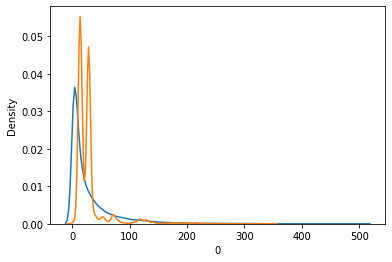

In [ ]:
ax = sns.distplot(y_test, hist=False, label="Actual Value")
sns.distplot(y_pred,hist=False, label="Fitted Values" , ax=ax)

In [ ]:
dump(forest_model, 'C:/Users/germa/Desktop/DS4A/modelos/forest_cluster_3_demo.joblib')

['C:/Users/germa/Desktop/DS4A/modelos/forest_cluster_3_demo.joblib']

##### Residuals manage

we explored the residuals and tried to adjust them to a normal distribution to get better results. First, we used a qqplot to observe their distribution against a normal distribution.

c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

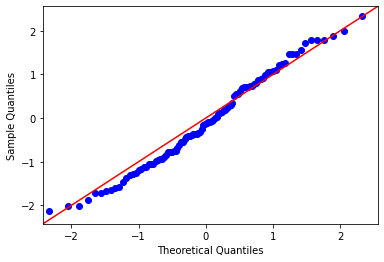

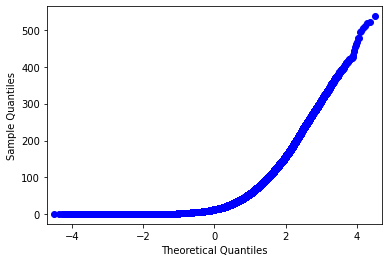

In [ ]:
plt.figure()
data_points = np.random.normal(0, 1, 100)    
  
sm.qqplot(data_points, line ='45')

sm.qqplot(y)
plt.show

Looking at the qqplot, we decided to use a **boxcox transformation**

In [ ]:
transfor,lammda = stats.boxcox(y)
lammda

0.020929205979487504

c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

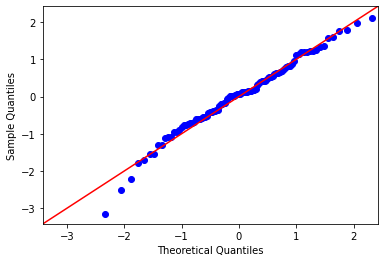

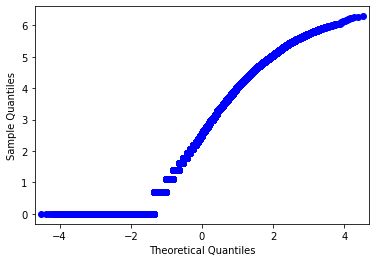

In [ ]:
plt.figure()
data_points = np.random.normal(0, 1, 100)    
  
sm.qqplot(data_points, line ='45')

sm.qqplot(np.log(y))
plt.show

After looking at the new qqplot, we transformed our variable and did all the process again.

In [ ]:
y = np.log(y)

##### RandomForest Regressor with transformed variable

In [ ]:
meses = list()
for m in range(1,7):
    mes = valid2[valid2['val_month']==m]
    meses.append((mes,y[mes.index]))

X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.DataFrame()
y_test = pd.DataFrame()

for mes,res in meses:
    train = mes.sample(frac = 0.7)
    test = mes.drop(train.index)
    X_train = pd.concat([X_train, train])
    X_test = pd.concat([X_test, test])
    y_train = pd.concat([y_train, y[train.index]])
    y_test = pd.concat([y_test, y[test.index]])
    
y_train = y_train[0]
y_test = y_test[0]

In [ ]:
forest_model = RandomForestRegressor(max_depth=10, random_state = 0, n_jobs=-1)
forest_model.fit(X_train,y_train)
scores = cross_val_score(forest_model,valid2,y,cv = 5,n_jobs=-1)
print(scores.mean(),scores.std())

0.31755704792044703 0.021013494632226067


In [ ]:
y_test

0         0.000000
2         0.000000
5         0.000000
7         0.693147
12        0.000000
            ...   
317722    2.302585
317724    1.609438
317725    1.098612
317726    1.609438
317727    0.000000
Name: 0, Length: 95318, dtype: float64

In [ ]:
y_pred = forest_model.predict(X_test)

In [ ]:
mean_squared_error(y_test, forest_model.predict(X_test), squared=False)

1.1419659764258723

In [ ]:
mean_absolute_error(y_test, forest_model.predict(X_test))

0.9165911583184659

##### Density comparison

c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='0', ylabel='Density'>

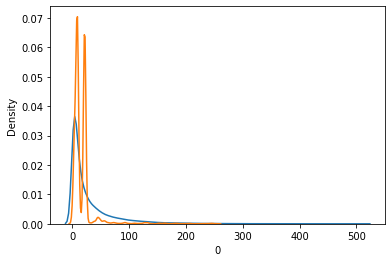

In [ ]:
ax = sns.distplot(np.exp(y_test), hist=False, label="Actual Value")
sns.distplot(np.exp(y_pred),hist=False, label="Fitted Values" , ax=ax)

##### Linear Regression with transformed variable

After this, we tried the linear regression again using crossvalidation and the transformed variable.

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
scores = cross_val_score(linear_model,valid2,y,cv = 5)
print(scores.mean(),scores.std())

-7.663519048931954e+18 1.4755507480153872e+19


In [ ]:
linear_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

After all this process, we observed that linear model wasn't our option at all and the RandomForest wasn't preforming as good as expected in all the clusters. That is why we explored another tool: 'Neural networks'.

##### Neural net

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

First, we tried with neural network models tunning the hyperparameters and the activation functions.

In [ ]:
model = Sequential()
model.add(Dense(len(X_train.columns)+1, input_shape=[len(X_train.columns),]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer = 'adam')

In [ ]:
model.fit(X_train, y_train, epochs=50, validation_split = 0.2, verbose=1)

Epoch 1/50
4362/4362 [==============================] - 10s 2ms/step - loss: 479.5230 - val_loss: 389.1446
Epoch 2/50
4362/4362 [==============================] - 10s 2ms/step - loss: 290.2679 - val_loss: 295.7515
Epoch 3/50
4362/4362 [==============================] - 10s 2ms/step - loss: 249.8072 - val_loss: 371.1176
Epoch 4/50
4362/4362 [==============================] - 10s 2ms/step - loss: 219.9931 - val_loss: 359.1674
Epoch 5/50
4362/4362 [==============================] - 11s 2ms/step - loss: 215.6733 - val_loss: 303.8187
Epoch 6/50
4362/4362 [==============================] - 11s 3ms/step - loss: 203.5973 - val_loss: 351.7956
Epoch 7/50
4362/4362 [==============================] - 11s 3ms/step - loss: 194.8321 - val_loss: 317.2918
Epoch 8/50
4362/4362 [==============================] - 10s 2ms/step - loss: 183.2434 - val_loss: 362.7463
Epoch 9/50
4362/4362 [==============================] - 11s 3ms/step - loss: 182.4604 - val_loss: 327.9452
Epoch 10/50
4362/4362 [==============

In [ ]:
np.sqrt(model.evaluate(X_test, y_test))

2337/2337 [==============================] - 3s 1ms/step - loss: 193.2803


13.902529786792627

In [ ]:
mean_absolute_error(y_test,model.predict(X_test).flatten())

6.804957477714274

In [ ]:
mean_squared_error(y_test,model.predict(X_test).flatten(), squared=False)

13.902528811223291

In [ ]:
model_call = Sequential()
model_call.add(Dense(len(X_train.columns)+1, input_shape=[len(X_train.columns),]))
model_call.add(Dense(256, activation='relu'))
model_call.add(Dropout(0.2))
model_call.add(Dense(256, activation='relu'))
model_call.add(Dense(1, activation='relu'))
model_call.compile(loss='mse', optimizer = 'adam')

In [ ]:
model_call.fit(X_train, y_train, epochs=50, validation_split = 0.2, verbose=1, callbacks=[callback])

Epoch 1/50
4362/4362 [==============================] - 9s 2ms/step - loss: 546.0336 - val_loss: 331.5774
Epoch 2/50
4362/4362 [==============================] - 9s 2ms/step - loss: 245.3163 - val_loss: 332.6655
Epoch 3/50
4362/4362 [==============================] - 9s 2ms/step - loss: 212.4090 - val_loss: 291.5381
Epoch 4/50
4362/4362 [==============================] - 9s 2ms/step - loss: 196.2442 - val_loss: 380.4932
Epoch 5/50
4362/4362 [==============================] - 9s 2ms/step - loss: 175.7546 - val_loss: 342.6688
Epoch 6/50
4362/4362 [==============================] - 9s 2ms/step - loss: 172.8425 - val_loss: 397.5804


In [ ]:
np.sqrt(model_call.evaluate(X_test, y_test))

2337/2337 [==============================] - 3s 1ms/step - loss: 293.7150


17.138114418462507

In [ ]:
mean_absolute_error(y_test,model_call.predict(X_test).flatten())

8.407667727739563

In [ ]:
mean_squared_error(y_test,model_call.predict(X_test).flatten(), squared=False)

17.13810225949956

c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\germa\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='0', ylabel='Density'>

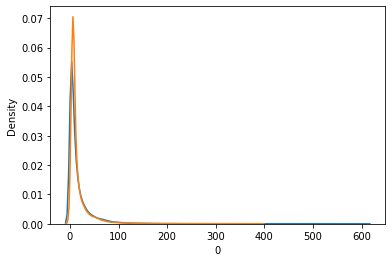

In [ ]:
ax = sns.distplot(y_test, hist=False, label="Actual Value")
sns.distplot(model.predict(X_test).flatten(), hist=False, label="Fitted Values" , ax=ax)

Lastly, we observed that the neural network gave better results in the majority of the cases and was our way to go in the clusters with large data.

In [ ]:
model.save('C:/Users/germa/Desktop/DS4A/modelos/nn_cluster_2')

INFO:tensorflow:Assets written to: C:/Users/germa/Desktop/DS4A/modelos/nn_cluster_2\assets


In [ ]:
(y_test - model.predict(X_test).flatten()).sort_values()

15112    -59.448952
22864    -54.619843
2462     -49.775482
2401     -44.853378
28867    -40.187714
            ...    
28811     58.466278
15238     68.460815
28716     71.372215
35131     72.635866
14873    106.143112
Name: 0, Length: 12223, dtype: float64

This process was made with each cluster only changing the **i** in the *valid2* variable to get the best parameters for each cluster and its characteristics.